In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Sigma1 = np.array([[1, 0], [0, 1]])
mu1 = np.array([1, 1])
Sigma2 = np.array([[6, 0], [0, 6]])
mu2 = np.array([6, 6])

In [3]:
Sigma1 = np.array([[3, 0], [0, 3]])
mu1 = np.array([3, 5])
Sigma2 = np.array([[1, 0], [0, 1]])
mu2 = np.array([10, 5])

In [3]:
from sklearn.datasets import make_blobs

n_samples = 300
n_cls = 2

X,y = make_blobs( 
        n_samples=n_samples,
        centers=[mu1, mu2],  
        cluster_std=[1, 2.45]#[[3, 3], [1, 1]]
    )


lmbd = [ 1.1, ]*n_cls  # коэффициент "цены" ошибки

X.shape, y.shape

((300, 2), (300,))

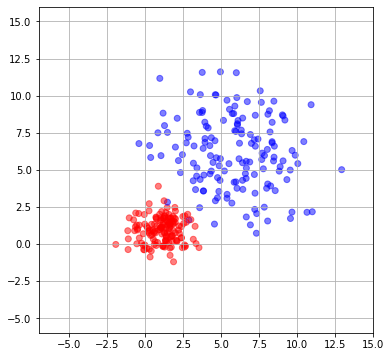

In [4]:
plt.figure(figsize=(6, 6))
plt.xlim(-7, 15)
plt.ylim(-6, 16)
plt.scatter(X[:,0], X[:,1], c = [['r','b','g','y'][j] for j in y], alpha=0.5 )   
plt.grid()
plt.show()

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
clf = GaussianNB().fit(X, y)

In [12]:
y_pred = clf.predict(X)

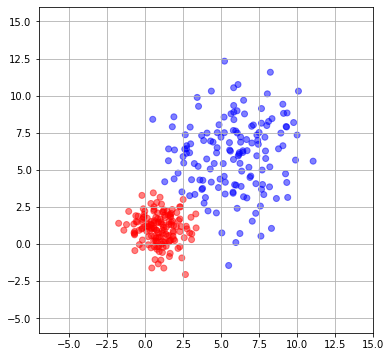

In [13]:
plt.figure(figsize=(6, 6))
plt.xlim(-7, 15)
plt.ylim(-6, 16)
plt.scatter(X[:,0], X[:,1], c = [['r','b','g','y'][j] for j in y_pred], alpha=0.5 )   
plt.grid()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, )

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((150, 2), (150,), (150, 2), (150,))

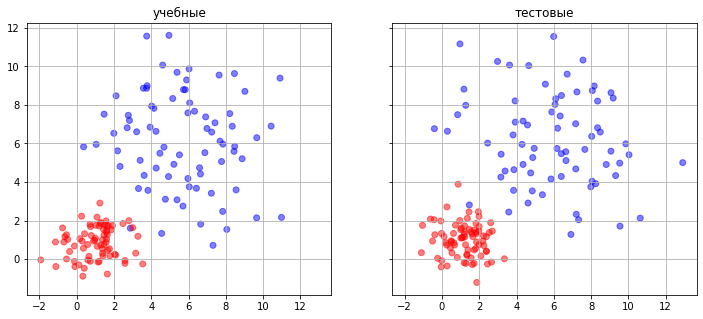

In [6]:
def plot_data(ax,X,y,t, marker='o'):
    c = [ ['r','b','g','y'][j] for j in y  ]
    ax.set_title(t)
    ax.scatter( x=X[:,0], y=X[:,1], c=c,  alpha=0.5, marker=marker )
    ax.grid()

fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_train,y_train,'учебные')    
plot_data(ax1,X_test,y_test,'тестовые')    
plt.show()

In [16]:
def K(x): return (1.0 - x**2) * 0.75

In [7]:
def K(x): return 0.5 * (abs(x) < 1)

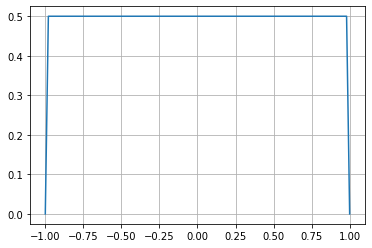

In [8]:
x = np.linspace(-1,1,100)
plt.plot(x,K(x))
plt.grid()
plt.show()

In [9]:
# евклидова метрика
def rho(x1,x2): return np.sqrt(np.square(x1-x2).sum(axis=1))

$ a(x) = \underset{y\in Y}{\operatorname{argmax}} \left[ \lambda_y P_y \frac{1}{l_y} \underset{i:y=y_i}{\sum} K\left(\frac{\rho(x-x_i)}{h}\right) \right] $

In [10]:
def bayes_score(X,Xl,yl,lmbd_n,h,n,Py_n,ly_n): # скор принадлежности X к классу n
    # Xl,yl - учебный набор
    # Py_n - априорная вероятность класса n
    # ly_n - количество объектов в классе n
    # lmbd_n - цена ошибки класса n
    # h - ширина парзеновского окна
    
    Xn = Xl[yl==n,:] # точки класса n

    # для каждой точки набора X
    # считаем растояние до всех точек учебного класса
    r = np.asarray([ rho(X[i,:],Xn) for i in range(X.shape[0]) ]) 
    
    # применяем ядро и суммируем
    r = K( r / h).sum(axis=1)

    return ( Py_n * lmbd_n / ly_n ) * r

In [11]:
def bayes(X,Xl,yl,lmbd,h): # байесовский классификатор
    # для кажной точки набора X 
    # хаходим номер класса с наибольшим скором
    # Xl,yl - учебный набор
    # lmbd - цена ошибки классов    
    # h - ширина окна
    
    # количество объектов в классах
    ly = np.asarray([ (yl==c).sum() for c in sorted(set(yl)) ])
    Py = ly/ly.sum() # априорные вероятности классов
    
    return np.argmax( 
        np.asarray([ 
            bayes_score(X,Xl,yl,lmbd[n],h,n,Py[n],ly[n])  
            for n in sorted(set(yl)) 
        ]),
        axis=0 )

In [12]:
# LOO ( leave one out) - скользящий контроль,
# выбираем объект учебного набора X,y
# удаляем его из набора
# выполняем его классификацию и проверяем ответ
def loo(X,y,lmbd,h):
    er = 0 # количество ошибок
    for i in range(X.shape[0]):
        xi,yi = X[i,:].reshape(1,X.shape[1]),y[i] # выбираем объект учебного набора
        # удаляем его из набора
        Xl,yl = np.delete(X, i, axis=0), np.delete(y, i, axis=0)
        er += int(bayes(xi,Xl,yl,lmbd,h) != yi) # выполняем классификацию и проверяем ответ

    return er

In [13]:
# подбираем параметр ширины парзеновского окна 
er = []
for h in range(1, 10):
    er.append(loo(X_train,y_train,lmbd,h))
h = er[min(er)]

In [14]:
er

[13, 3, 3, 4, 8, 11, 14, 11, 6]

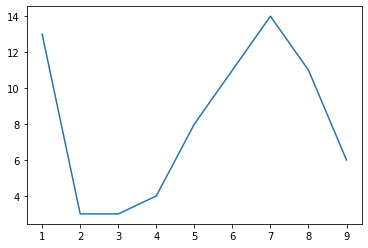

In [15]:
plt.plot(range(1, 10), er)

In [16]:
h = np.argmin(er) + 1
h

2

In [91]:
o

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [17]:
o = bayes(X_test,X_train,y_train,lmbd,h)
o.shape

(150,)

In [18]:
xlim = (-2.5, 17.5)
ylim = (-4, 15)
dist = 0.4

In [19]:
x2, y2 = np.meshgrid(np.linspace(xlim[0], xlim[1], round(xlim[1] - xlim[0] / dist)), np.linspace(ylim[0], ylim[1], round(ylim[1] - ylim[0] / dist)))
X_grid = np.hstack([x2.reshape(-1, 1), y2.reshape(-1, 1)])

In [20]:
y_grid = bayes(X_grid, X_train, y_train, lmbd, h)

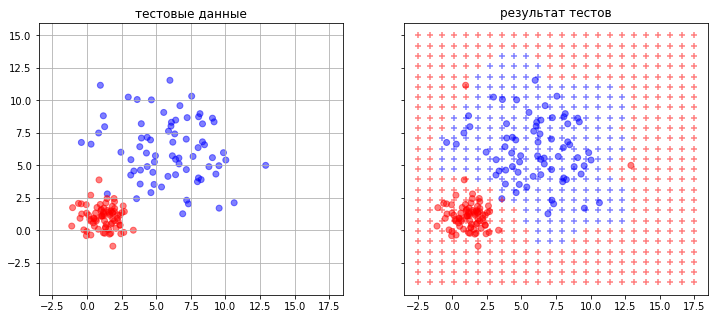

In [21]:
fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_test,y_test,'тестовые данные')    
plot_data(ax1,X_test,o,'результат тестов')  
plot_data(ax1,X_grid,y_grid,'результат тестов', marker='+')    
plt.show()

In [146]:
Xn = X_train[y_train == 1, :]
Xn.shape[0]

74

In [147]:
m = Xn.shape[0]
myj = (1 / m * np.sum(Xn, axis=0))#.reshape(-1, 1)
    
syj = (1/Xn.shape[0] * np.sum(np.square(Xn - myj), axis = 0))#.reshape(-1, 1)

In [148]:
myj.shape

(2,)

In [149]:
myj

array([5.57810146, 5.75633457])

In [150]:
syj.shape

(2,)

In [151]:
syj

array([5.02340651, 6.3029053 ])

In [152]:
r = 1 / (np.sqrt(2 * np.pi) * syj) * np.exp(-(np.square(X - myj)) / (2 * np.square(syj)))

In [153]:
r.shape

(300, 2)

In [284]:
r.sum(axis=1).shape

(300,)

In [22]:
def nbayes_score(X,Xl,yl,lmbd_n,h,n,Py_n,ly_n): # скор принадлежности X к классу n
    # Xl,yl - учебный набор
    # Py_n - априорная вероятность класса n
    # ly_n - количество объектов в классе n
    # lmbd_n - цена ошибки класса n
    # h - ширина парзеновского окна
    
    Xn = Xl[yl==n,:] # точки класса n
    
    m = Xn.shape[0]
    
    myj = (1 / m * np.sum(Xn, axis=0))#.reshape(-1, 1)
    
    syj = (1/Xn.shape[0] * np.sum(np.square(Xn - myj), axis = 0))#.reshape(-1, 1)
    
    
    r = 1 / (np.sqrt(2 * np.pi) * syj) * np.exp(-(np.square(X - myj)) / (2 * np.square(syj)))
    r = r.sum(axis=1)

    return ( Py_n * lmbd_n ) * r

In [23]:
def nbayes(X,Xl,yl,lmbd,h): # байесовский классификатор
    # для кажной точки набора X 
    # хаходим номер класса с наибольшим скором
    # Xl,yl - учебный набор
    # lmbd - цена ошибки классов    
    # h - ширина окна
    
    # количество объектов в классах
    ly = np.asarray([ (yl==c).sum() for c in sorted(set(yl)) ])
    Py = ly/ly.sum() # априорные вероятности классов
    
    return np.argmax( 
        np.asarray([ 
            nbayes_score(X,Xl,yl,lmbd[n],h,n,Py[n],ly[n])  
            for n in sorted(set(yl)) 
        ]),
        axis=0 )

In [24]:
nn = nbayes(X_test,X_train,y_train,lmbd,h)
nn.shape

(150,)

In [273]:
nn

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [38]:
y_grid = nbayes(X_grid, X_train, y_train, lmbd, h)

In [39]:
y_grid.shape

(600,)

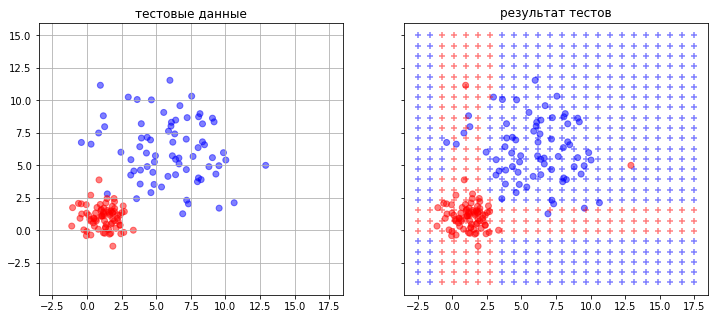

In [26]:
fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_test,y_test,'тестовые данные')    
plot_data(ax1,X_test,o,'результат тестов')  
plot_data(ax1,X_grid,y_grid,'результат тестов', marker='+')    
plt.show()

In [246]:
Xn = X_train[y_train == 1, :]
m = Xn.shape[0]
m

74

In [247]:
mkr = 1 / m * np.sum(Xn, axis = 0)
mkr.shape

(2,)

In [248]:
mkr

array([5.57810146, 5.75633457])

In [249]:
skr = 1/(m-1) * np.dot((Xn - mkr).T, (Xn - mkr))
skr

array([[5.0922203 , 1.08507949],
       [1.08507949, 6.38924647]])

In [251]:
det_skr = np.linalg.det(skr)
obr_skr = np.linalg.inv(skr)

In [259]:
N = (1/(2 * np.pi) ** 2 *  det_skr) * np.exp(-0.5 * np.dot((X - mkr), np.dot(obr_skr, (X - mkr).T)))

In [283]:
N.sum(axis=0).shape

(300,)

In [282]:
N.shape

(300, 300)

In [328]:
Xn = X_train[y_train == 0, :]
    
m = Xn.shape[0]
print('m = ' + str(m))

mkr = 1 / m * np.sum(Xn, axis = 0)

skr = 1/(m-1) * np.dot((Xn - mkr).T, (Xn - mkr))
print('skr.shape = ' + str(skr.shape))
det_skr = np.linalg.det(skr)
obr_skr = np.linalg.inv(skr)


N = (1/(2 * np.pi) ** 2 *  det_skr) * np.exp(-0.5 * np.dot((X - mkr), np.dot(obr_skr, (X - mkr).T)))
print('N.shape = ' + str(N.shape))
N = N.sum(axis=0)

m = 76
skr.shape = (2, 2)
N.shape = (300, 300)


In [298]:
np.argmax( 
        np.asarray([ 
            pbayes_score(X_test,X_train,y_train,1,h,n,0.5,75)  
            for n in sorted(set(y_train)) 
        ]),
        axis=0 )

array([[1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1]], dtype=int64)

In [323]:
pbayes_score(X_test,X_train,y_train,1,h,0,0.5,75).shape

Xl.shape = (150, 2)
m = 76
skr.shape = (2, 2)
Xl.shape = (150, 2)


(150,)

In [40]:
def pbayes_score(X,Xl,yl,lmbd_n,h,n,Py_n,ly_n): # скор принадлежности X к классу n
    # Xl,yl - учебный набор
    # Py_n - априорная вероятность класса n
    # ly_n - количество объектов в классе n
    # lmbd_n - цена ошибки класса n
    # h - ширина парзеновского окна
    
    Xn = Xl[yl==n,:] # точки класса n
    
    m = Xn.shape[0]

    mkr = 1 / m * np.sum(Xn, axis = 0)

    skr = 1/(m-1) * np.dot((Xn - mkr).T, (Xn - mkr))
    det_skr = np.linalg.det(skr)
    obr_skr = np.linalg.inv(skr)


    N = (1/(2 * np.pi) ** 2 *  det_skr) * np.exp(-0.5 * np.dot((X - mkr), np.dot(obr_skr, (X - mkr).T)))
    N = N.sum(axis=0)

    return ( Py_n * lmbd_n ) * N

In [41]:
def pbayes(X,Xl,yl,lmbd,h): # байесовский классификатор
    # для кажной точки набора X 
    # хаходим номер класса с наибольшим скором
    # Xl,yl - учебный набор
    # lmbd - цена ошибки классов    
    # h - ширина окна
    
    # количество объектов в классах
    ly = np.asarray([ (yl==c).sum() for c in sorted(set(yl)) ])
    Py = ly/ly.sum() # априорные вероятности классов
    
    return np.argmax( 
        np.asarray([ 
            pbayes_score(X,Xl,yl,lmbd[n],h,n,Py[n],ly[n])  
            for n in sorted(set(yl)) 
        ]),
        axis=0 )

In [42]:
pp = pbayes(X_test,X_train,y_train,lmbd,h)
pp.shape

(150,)

In [43]:
pp

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [44]:
y_grid = pbayes(X_grid, X_train, y_train, lmbd, h)

In [347]:
y_grid

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [35]:
X_grid.shape

(600, 2)

In [36]:
y_grid.shape

(150,)

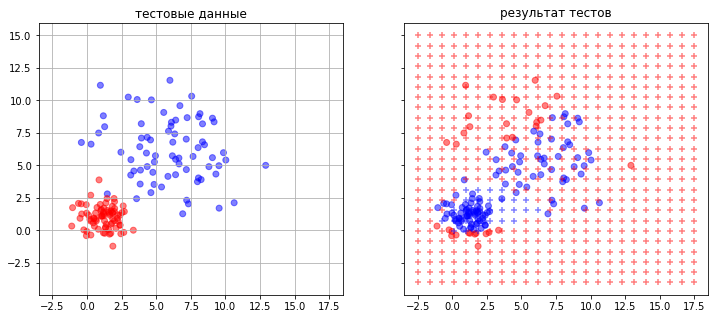

In [45]:
fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_test,y_test,'тестовые данные')    
plot_data(ax1,X_test,pp,'результат тестов')  
plot_data(ax1,X_grid,y_grid,'результат тестов', marker='+')    
plt.show()

In [46]:
pp.shape

(150,)

In [47]:
o

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [48]:
pp

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)